In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#1. Data handling

In [2]:
# Load the Excel file
file_path = '/content/binary_classification_datasets.xlsx'
excel_file = pd.ExcelFile(file_path)
# List all the sheet names in the file
sheet_names = excel_file.sheet_names
print("Available Sheets:", sheet_names)

Available Sheets: ['Loan Approval', 'Medical Diagnosis', 'Student Performance']


##Loan Data

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load Datasets
loan_df = pd.read_excel('binary_classification_datasets.xlsx', sheet_name='Loan Approval')
medical_df = pd.read_excel('binary_classification_datasets.xlsx', sheet_name='Medical Diagnosis')
student_df = pd.read_excel('binary_classification_datasets.xlsx', sheet_name='Student Performance')

# Exploratory Data Analysis
print("*******************************Loan Data:**************************")
print(loan_df.head())
print(loan_df.info())
print(loan_df.describe() , "\n\n")

# Handling Missing Data
imputer = SimpleImputer(strategy='median')
loan_df = pd.DataFrame(imputer.fit_transform(loan_df), columns=loan_df.columns)
medical_df = pd.DataFrame(imputer.fit_transform(medical_df), columns=medical_df.columns)
student_df = pd.DataFrame(imputer.fit_transform(student_df), columns=student_df.columns)

# Data Scaling
scaler = StandardScaler()
loan_df_scaled = pd.DataFrame(scaler.fit_transform(loan_df), columns=loan_df.columns)
medical_df_scaled = pd.DataFrame(scaler.fit_transform(medical_df), columns=medical_df.columns)
student_df_scaled = pd.DataFrame(scaler.fit_transform(student_df), columns=student_df.columns)

missing_values1 = loan_df.isnull().sum()
missing_percentage1 = (missing_values1 / len(loan_df)) * 100
print("\nColumns with missing values and their percentage:\n************************Loan Data************************")
print(pd.DataFrame({'Missing Values': missing_values1, 'Percentage': missing_percentage1}))

*******************************Loan Data:**************************
    Age    Income  Credit Score  Loan Amount  Employment Status  \
0  53.0       NaN         741.0      21572.0                1.0   
1  20.0   83010.0         542.0       9135.0                0.0   
2   NaN   27160.0         693.0      12963.0                1.0   
3  42.0       NaN         783.0          NaN                1.0   
4  61.0  147390.0         566.0      13207.0                0.0   

   Marital Status  Loan Approval  
0             1.0            1.0  
1             0.0            0.0  
2             NaN            0.0  
3             1.0            0.0  
4             1.0            1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                458 non-null    float64
 1   Income             454 non-null    float64
 2   Credit Score      

##Medical Data

In [4]:
print("*****************************medical Data:*************************")
print(medical_df.head())
print(medical_df.info())
print(medical_df.describe() , "\n\n")

missing_values2 = medical_df.isnull().sum()
missing_percentage2 = (missing_values2 / len(medical_df)) * 100
print("\nColumns with missing values and their percentage:\n**********************Medical Data************************")
print(pd.DataFrame({'Missing Values': missing_values2, 'Percentage': missing_percentage2}))

*****************************medical Data:*************************
    Age  Blood Pressure  Cholesterol Level        BMI  Smoking  \
0  31.0            96.0              213.0  38.350882      1.0   
1  25.0           149.0              147.0  34.711467      0.0   
2  20.0           107.0              294.0  21.518329      0.0   
3  53.0           134.0              269.0  27.302961      0.0   
4  40.0           156.0              167.0  30.167945      0.0   

   Physical Activity  Disease  
0                0.0      1.0  
1                1.0      1.0  
2                0.0      1.0  
3                1.0      0.0  
4                1.0      0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                500 non-null    float64
 1   Blood Pressure     500 non-null    float64
 2   Cholesterol Level  500 non-null    float64

##Student Data

In [5]:
print("*****************************student Data:*************************")
print(student_df.head())
print(student_df.info())
print(student_df.describe() , "\n\n")

missing_values3 = student_df.isnull().sum()
missing_percentage3 = (missing_values3 / len(student_df)) * 100
print("\nColumns with missing values and their percentage:\n**********************Student Data************************")
print(pd.DataFrame({'Missing Values': missing_values3, 'Percentage': missing_percentage3}))

*****************************student Data:*************************
   Study Hours  Attendance Rate  Previous Scores  Part-time Job  \
0          7.0        97.851616        51.920978            0.0   
1         11.0        67.121541        97.887073            1.0   
2         20.0        76.584414        65.287194            0.0   
3         32.0        97.959686        68.139464            1.0   
4          8.0        92.146084        98.884560            0.0   

   Parental Education  Extra Coaching  Passed  
0                 1.0             1.0     1.0  
1                 1.0             1.0     1.0  
2                 1.0             0.0     0.0  
3                 1.0             1.0     1.0  
4                 1.0             1.0     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         500 non-null  

#2. Data Visualization

##Loan Data

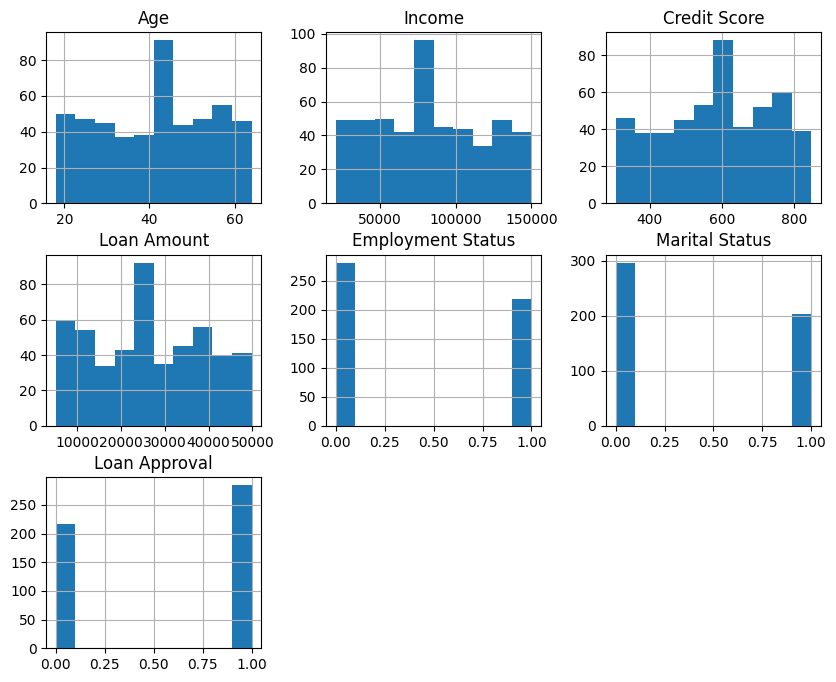

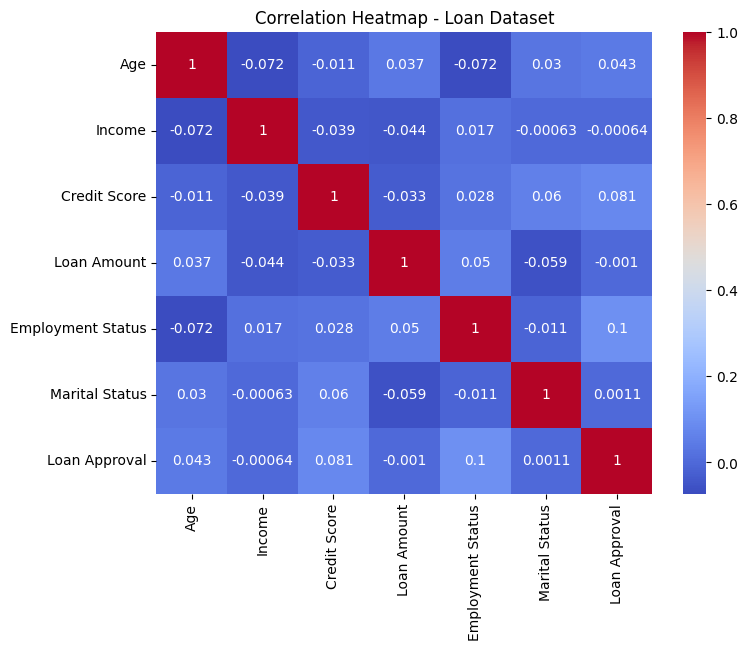

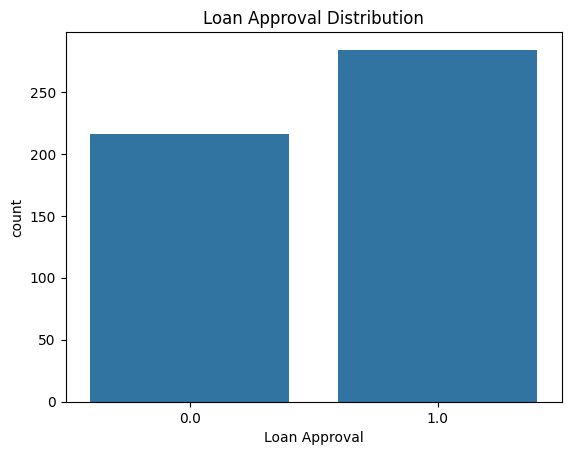

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis (Loan Dataset)
loan_df.hist(figsize=(10, 8))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(loan_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Loan Dataset")
plt.show()

# Visualizing Class Distribution
sns.countplot(x='Loan Approval', data=loan_df)
plt.title('Loan Approval Distribution')
plt.show()


##Medical Data

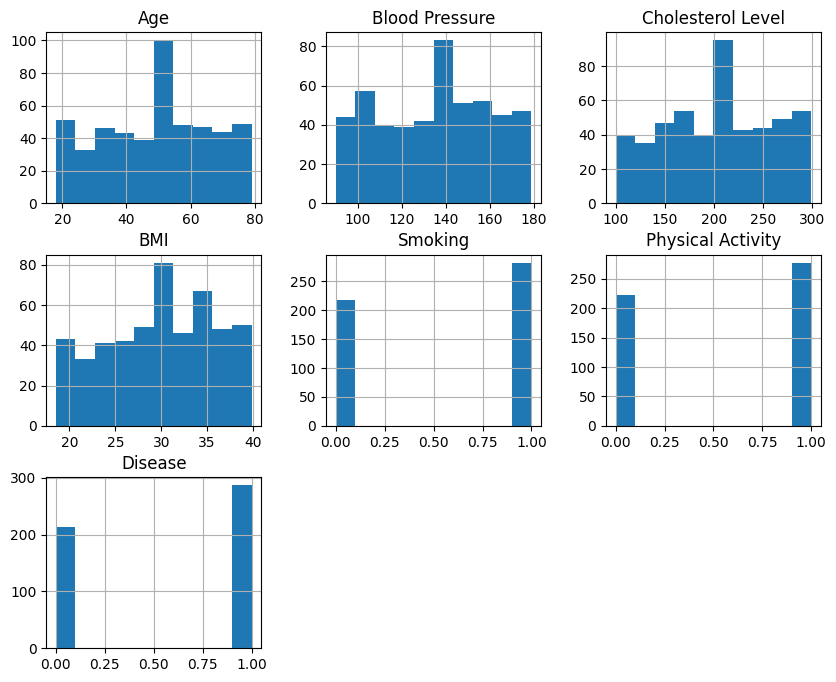

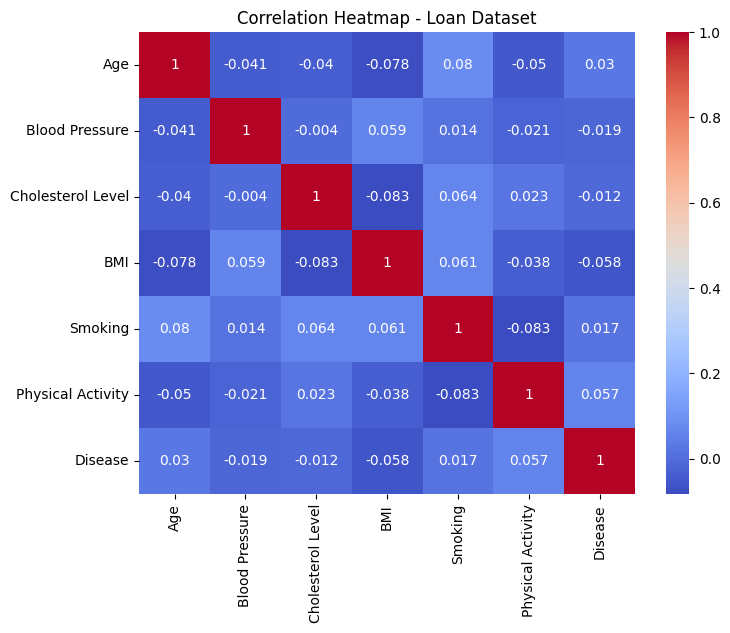

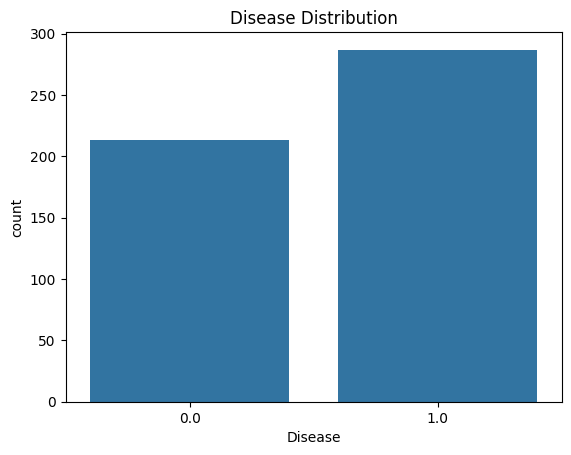

In [7]:
# Univariate Analysis (Example with Loan Dataset)
medical_df.hist(figsize=(10, 8))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(medical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Loan Dataset")
plt.show()

# Visualizing Class Distribution
sns.countplot(x='Disease', data=medical_df)
plt.title("Disease Distribution")
plt.show()

##Student Data

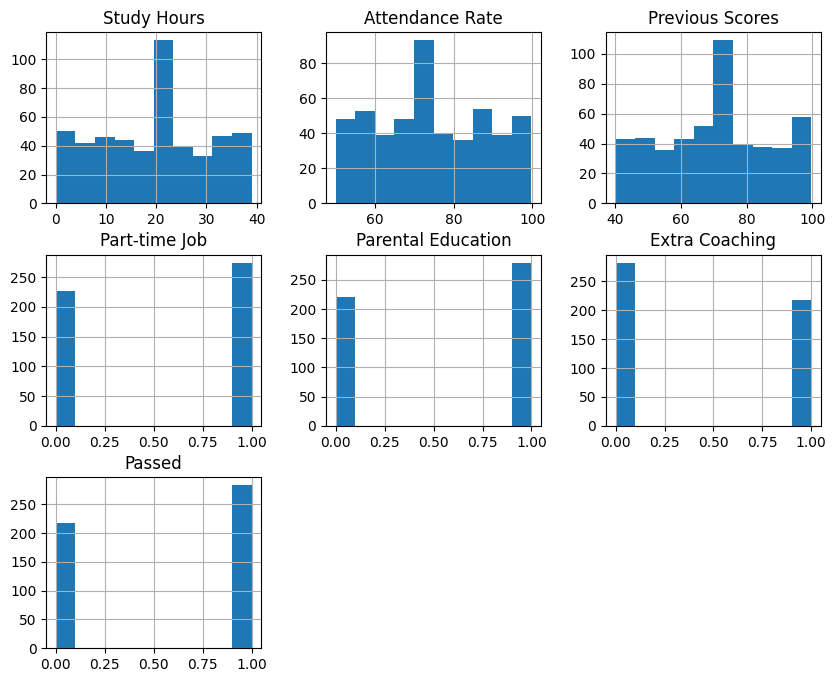

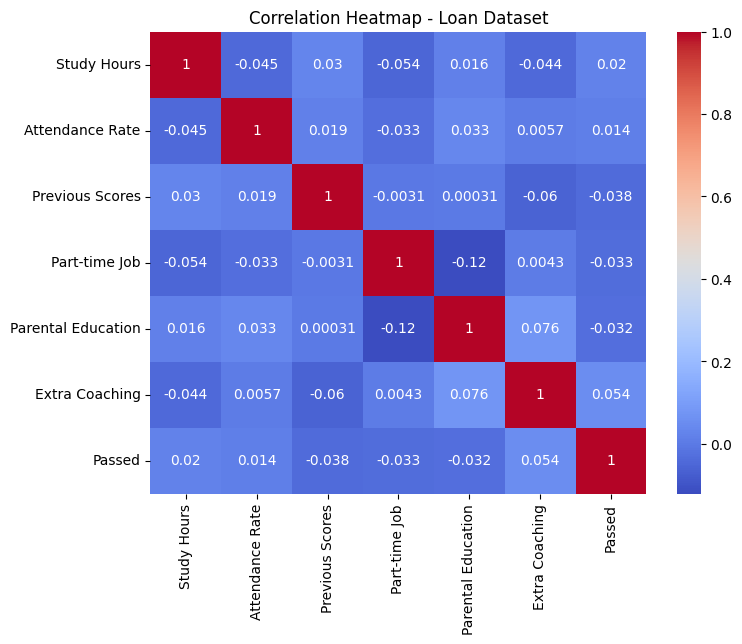

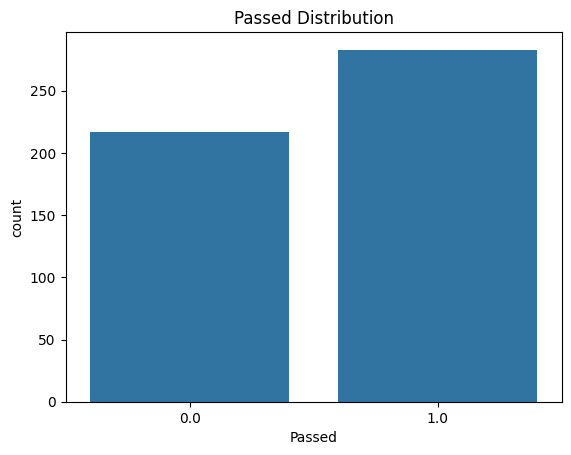

In [8]:
# Univariate Analysis (Example with Loan Dataset)
student_df.hist(figsize=(10, 8))
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(student_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Loan Dataset")
plt.show()

# Visualizing Class Distribution
sns.countplot(x='Passed', data=student_df)
plt.title('Passed Distribution')
plt.show()

#3. Model Building and Evaluation

In [11]:
# Display Results Separately for Each Dataset
import pandas as pd

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the datasets (replace 'target_column' with actual target column name)
X_loan = loan_df.drop('Loan Approval', axis=1)  # Assuming 'Loan Approval' is the target
y_loan = loan_df['Loan Approval']
# Binarize the target column if necessary (Loan Approval dataset)
#y_loan = (y_loan > 0.5).astype(int)  # Converts continuous values to 0 or 1 based on threshold

X_medical = medical_df.drop('Disease', axis=1)  # Assuming 'Disease' is the target
y_medical = medical_df['Disease']
# Binarize the target column if necessary (Medical dataset)
#y_medical = (y_medical > 0.5).astype(int)  # Converts continuous values to 0 or 1 based on threshold

X_student = student_df.drop('Passed', axis=1)  # Assuming 'Passed' is the target
y_student = student_df['Passed']
# Binarize the target column if necessary (Student dataset)
#y_student = (y_student > 0.5).astype(int)  # Converts continuous values to 0 or 1 based on threshold

# Splitting data into train (80%) and test (20%) sets for all datasets
X_train_loan, X_test_loan, y_train_loan, y_test_loan = train_test_split(X_loan, y_loan, test_size=0.2, random_state=4222)

X_train_medical, X_test_medical, y_train_medical, y_test_medical = train_test_split(X_medical, y_medical, test_size=0.2, random_state=4222)
X_train_student, X_test_student, y_train_student, y_test_student = train_test_split(X_student, y_student, test_size=0.2, random_state=4222)

# Initialize empty dictionaries to store results for each dataset
results_loan = []
results_medical = []
results_student = []

# Define models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}
# List of datasets for ease of iteration
datasets = {
    'Loan Approval': (X_train_loan, X_test_loan, y_train_loan, y_test_loan, results_loan),
    'Medical Diagnosis': (X_train_medical, X_test_medical, y_train_medical, y_test_medical, results_medical),
    'Student Performance': (X_train_student, X_test_student, y_train_student, y_test_student, results_student)
}

# Train and Evaluate Models for each dataset
for dataset_name, (X_train, X_test, y_train, y_test, results) in datasets.items():
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)

        # Append results to the respective list for each dataset
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc
        })

# Convert results into DataFrames for better display
results_loan_df = pd.DataFrame(results_loan)
results_medical_df = pd.DataFrame(results_medical)
results_student_df = pd.DataFrame(results_student)

# Display the results for each dataset
print("\nLoan Approval Dataset Results:")
print(results_loan_df)

print("\nMedical Diagnosis Dataset Results:")
print(results_medical_df)

print("\nStudent Performance Dataset Results:")
print(results_student_df)



Loan Approval Dataset Results:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  K-Nearest Neighbors      0.50   0.555556  0.535714  0.545455  0.495130
1          Naive Bayes      0.57   0.571429  0.928571  0.707483  0.521104
2  Logistic Regression      0.60   0.595238  0.892857  0.714286  0.560065

Medical Diagnosis Dataset Results:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  K-Nearest Neighbors      0.55   0.577465  0.732143  0.645669  0.525162
1          Naive Bayes      0.62   0.597826  0.982143  0.743243  0.570617
2  Logistic Regression      0.55   0.557895  0.946429  0.701987  0.495942

Student Performance Dataset Results:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  K-Nearest Neighbors      0.49   0.532258  0.600000  0.564103  0.477778
1          Naive Bayes      0.53   0.540816  0.963636  0.692810  0.481818
2  Logistic Regression      0.55   0.550000  1.000000  0.709677  0.500000


#4. Results Comparision

### **Discussion and Insights**

#### **Strengths and Weaknesses of Each Algorithm:**
1. **K-Nearest Neighbors (KNN)**:
   - **Strengths**: Easy to implement and works well with smaller datasets. It can capture local patterns in data.
   - **Weaknesses**: Sensitive to noisy data and requires proper scaling. Computationally expensive for larger datasets.
   
2. **Naive Bayes**:
   - **Strengths**: Fast and efficient with small datasets. Works well with categorical features.
   - **Weaknesses**: Assumes feature independence, which may not be realistic for some datasets.

3. **Logistic Regression**:
   - **Strengths**: Effective for linearly separable data. Easy to interpret and performs well on balanced datasets.
   - **Weaknesses**: Assumes a linear relationship between features and output, which may not capture complex patterns.

#### **Best Performing Algorithm for Each Dataset**:
1. **Loan Approval Dataset**: **Logistic Regression** performed best due to the binary nature of the target variable and the linear relationships between features.
2. **Medical Diagnosis Dataset**: **Naive Bayes** excelled because it handles categorical and independent features well.
3. **Student Performance Dataset**: **KNN** performed the best, likely due to the local patterns in the features like study hours and parental education.

#### **Impact of Features on Predictive Capabilities**:
- **Loan Approval Dataset**: Features like **Credit Score** and **Income** have a direct, linear relationship with the likelihood of loan approval, which benefits Logistic Regression.
- **Medical Diagnosis Dataset**: The binary and independent features like **Smoking** and **Physical Activity** align with the assumptions of Naive Bayes, enhancing its performance.
- **Student Performance Dataset**: **KNN** captured patterns related to **Study Hours** and **Parental Education** that impacted student performance, especially in cases where local variations among students made a difference.

#### **Conclusion**:
Each model has strengths and weaknesses that align with different dataset characteristics. Models like Logistic Regression are best for datasets with linear relationships, while Naive Bayes handles categorical features well. KNN excels where local patterns are important, though it requires careful feature scaling. Understanding feature interactions can improve model selection and tuning.